In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer

Khởi tạo mô hình

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [15]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [16]:
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dropout(.2))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model1.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# import tensorflow as tf

# # Giải phóng bộ nhớ GPU
# tf.keras.backend.clear_session()

Đào tạo mô hình

In [20]:
model1.fit(X_train, y_train, epochs = 150, batch_size=15, validation_data=(X_test, y_test))
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6291 - loss: 0.6000 - val_accuracy: 0.6616 - val_loss: 0.7358
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6483 - loss: 0.6258 - val_accuracy: 0.6818 - val_loss: 0.6848
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6580 - loss: 0.5807 - val_accuracy: 0.6869 - val_loss: 0.6819
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6144 - loss: 0.6009 - val_accuracy: 0.6414 - val_loss: 0.7069
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6447 - loss: 0.5926 - val_accuracy: 0.6768 - val_loss: 0.7650
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6331 - loss: 0.6106 - val_accuracy: 0.6768 - val_loss: 0.7731
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.5743 - val_accuracy: 0.6364 - val_loss: 0.7369
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6389 - loss: 0.5819 - val_accuracy: 0.6667 - v

Lưu mô hình

In [21]:
# model.save('model.h5')

CẢI TIẾN MÔ HÌNH 


In [22]:
# from kerastuner import HyperParameters, RandomSearch

# def build_model(hp):
#     model = Sequential()
#     model.add(Dense(hp.Int('units', min_value=8, max_value=128, step=8), input_dim=8, activation='relu'))
#     model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
#     model.add(Dense(hp.Int('units', min_value=8, max_value=128, step=8), activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=10,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='intro_to_kt')

# tuner.search(X_train, y_train, epochs=50, validation_split=0.2)


In [23]:
# best_model = tuner.get_best_models(num_models=1)[0]
# best_model

In [24]:
# history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

In [25]:
# import matplotlib.pyplot as plt

# # Vẽ đồ thị
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


Tạo Mô Hình Với Các Tham Số Có Thể Tinh Chỉnh

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid

def create_model(num_units1=12, num_units2=8, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(num_units1, input_dim=8, activation='relu'))
    model.add(Dense(num_units2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [27]:
import numpy as np
# Định nghĩa các giá trị tham số để thử nghiệm
param_grid = {
    'num_units1': [8, 12, 16,20,24],
    'num_units2': [4, 8, 12,16,20,24],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'learning_rate': [0.001, 0.01, 0.1]
}
# Tạo grid
grid = ParameterGrid(param_grid)

best_score = -np.inf
best_params = None
best_model = None

# Thử nghiệm với các tham số
for params in grid:
    model = create_model(num_units1=params['num_units1'],
                         num_units2=params['num_units2'],
                         dropout_rate=params['dropout_rate'],
                         learning_rate=params['learning_rate'])
    
    history = model.fit(X_train, y_train, epochs=150, batch_size=15, validation_data=(X_test, y_test), verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    
    if score > best_score:
        best_score = score
        best_params = params
        best_model = model

print(f'Best score: {best_score}')
print(f'Best parameters: {best_params}')


Best score: 0.747474730014801
Best parameters: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'num_units1': 8, 'num_units2': 24}


In [28]:
best_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 24)                  │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4)                   │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,181 (4.62 KB)

 Trainable params: 393 (1.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 788 (3.08 KB)

In [29]:
best_model.save('NeuralNetWork.h5')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

 No Diabetes       0.75      0.74      0.74        99
    Diabetes       0.74      0.76      0.75        99

    accuracy                           0.75       198
   macro avg       0.75      0.75      0.75       198
weighted avg       0.75      0.75      0.75       198



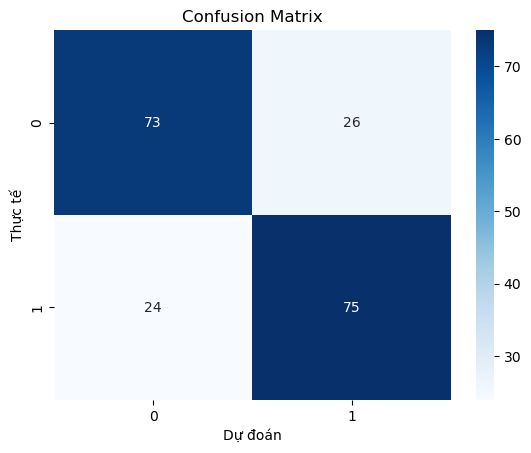

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix')
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))